In [1]:
import sys
sys.path.append("..")

from deepvideo import *

/home/caiafa/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Loading data

In [2]:
(X_train, y_train), (X_test, y_test) = get_ucf_dataset()

In [3]:
data = VideoLoader(16, input_shape=(1, 244, 244, 3), data_aug=get_augmentations(), label_mapping='../../UCF-101-dataset/Class Index.txt')

In [4]:
data.from_list('../../UCF-101-dataset/UCF-101-jpeg/', (X_train, y_train), (X_test, y_test))

In [ ]:
data.show_frames()

In [ ]:
data.show_videos()

## Building tfrecord dataset

In [ ]:
# data.build_tfrecord_dataset('../tfdataset', 10)

In [5]:
data.use_tfrecord_as_generator('../tfdataset/')

## Defining the model

In [6]:
model = VGG_19(classes=data.n_classes, input_shape=data.input_shape)

## Training

In [7]:
learner = VideoLearner(data, model)

In [8]:
learner.unfreeze()

In [9]:
learner.lr_find(2)

Epoch 1/2
595/595 [==============================] - 212s 356ms/step - loss: 10.6435 - acc: 0.0102
Epoch 2/2
595/595 [==============================] - 188s 316ms/step - loss: 15.9522 - acc: 0.0103


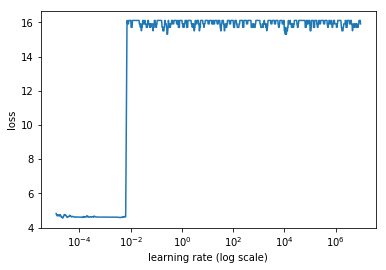

In [10]:
learner.recorder.plot_loss()

In [11]:
learner.fit_one_cycle(10, 0.0005)

Epoch 1/10
595/595 [==============================] - 318s 534ms/step - loss: 4.6027 - acc: 0.0118 - val_loss: 4.5249 - val_acc: 0.0196
Epoch 2/10
595/595 [==============================] - 275s 462ms/step - loss: 4.4009 - acc: 0.0375 - val_loss: 4.2488 - val_acc: 0.0596
Epoch 3/10
595/595 [==============================] - 279s 468ms/step - loss: 4.0758 - acc: 0.0774 - val_loss: 3.9519 - val_acc: 0.0953
Epoch 4/10
595/595 [==============================] - 277s 465ms/step - loss: 3.6661 - acc: 0.1234 - val_loss: 3.5594 - val_acc: 0.1486
Epoch 5/10
595/595 [==============================] - 302s 508ms/step - loss: 3.3252 - acc: 0.1787 - val_loss: 3.2931 - val_acc: 0.1986
Epoch 6/10
595/595 [==============================] - 286s 480ms/step - loss: 2.9629 - acc: 0.2464 - val_loss: 3.0729 - val_acc: 0.2428
Epoch 7/10
595/595 [==============================] - 289s 486ms/step - loss: 2.6118 - acc: 0.3224 - val_loss: 2.9169 - val_acc: 0.2789
Epoch 8/10
595/595 [============================

In [12]:
learner.fit_one_cycle(5, 0.00005)

Epoch 1/5
595/595 [==============================] - 290s 488ms/step - loss: 1.4151 - acc: 0.6096 - val_loss: 2.5498 - val_acc: 0.3861
Epoch 2/5
595/595 [==============================] - 280s 471ms/step - loss: 1.2808 - acc: 0.6396 - val_loss: 2.5089 - val_acc: 0.3988
Epoch 3/5
595/595 [==============================] - 283s 475ms/step - loss: 1.2507 - acc: 0.6418 - val_loss: 2.4989 - val_acc: 0.3994
Epoch 4/5
595/595 [==============================] - 284s 477ms/step - loss: 1.1723 - acc: 0.6662 - val_loss: 2.5476 - val_acc: 0.3983
Epoch 5/5
595/595 [==============================] - 289s 485ms/step - loss: 1.1374 - acc: 0.6730 - val_loss: 2.5389 - val_acc: 0.4044


In [13]:
learner.save('../models/rgb/Vgg19/Vgg19_rgb_1f_40')

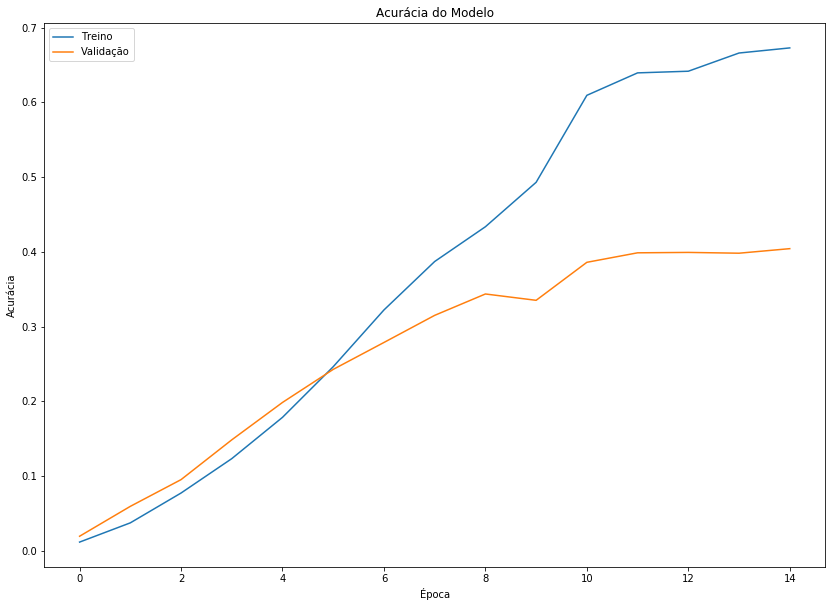

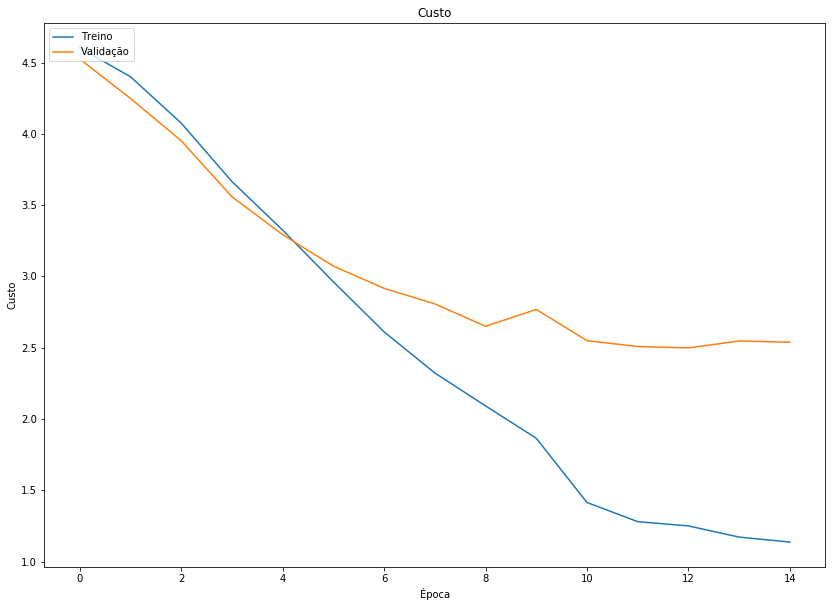

In [14]:
learner.plot_history()

In [15]:
learner.save_report('../models/rgb/Vgg19/')

In [ ]:
learner.load('../models/rgb/Vgg19/Vgg19_rgb_1f_val')

## Interpreting

In [ ]:
interp = VideoClassifier(learner, max_frames=128)

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
interp.report()